In [342]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

porter = nltk.PorterStemmer()

%matplotlib inline
stop = stopwords.words('english')
dir = 'C:\\Users\\Travis Park\\Google Drive\\UN\\Team MOZART RAP\\'

In [608]:
tfidfvectorizer =TfidfVectorizer(ngram_range = (1,2),sublinear_tf=False, 
                                 min_df = 0.01, max_features = 1100) 
def TFIDFtotable(inputlist1, inputlist2, newcollist):
    corpus = inputlist1 + inputlist2
    
    x = tfidfvectorizer.fit_transform(corpus)
    x = pd.DataFrame((x * x.T).A)
    
    x = x.ix[:len(inputlist1)-1,:len(inputlist2)-1]
    x.columns = newcollist
    x['Text'] = trimtext
    x = pd.merge(x, Paragraph_DF, how = 'left', left_on = 'Text', right_on = 'StemText')
    x=x.drop(['Text_x','Text_y','TrimText','StemText'],1)
    x=pd.melt(x, id_vars=['Number'])
    x.rename(columns={'Number':'Paragraph','variable': 'Target','value':'T_Cosine'}, inplace = True)
    TFIDFTable = x    
   

    return TFIDFTable

Feature Selection (look into domain lexicon (only use words from classes, dont need others)

In [464]:
SDG_Targets = pd.read_excel(dir +'SDG goalsTrav.xlsx', names = ['ID', 'Goal','OrigionalText','GoalText'],sheetname = 'Sheet1')
SDG_Targets['TrimGoal'] = ''

targtext = []
x=0

while x < len(SDG_Targets):
    y = SDG_Targets['GoalText'][x].lower().replace('-',' ').split(' ')
    y = [z for z in y if z.isalpha() if z not in stop]
    targtext.append(' '.join(y))
    x=x+1
    
SDG_Targets['TrimGoal'] = targtext

SDG_Targets.head()

,ID,Goal,OrigionalText,GoalText,TrimGoal
0,1,Poverty,Poverty End poverty in all its forms everywhere,poverty forms eveywhere,poverty forms eveywhere
1,2,Hunger,"Hunger End hunger, achieve food security and i...",hunger food security nutrition agriculture,hunger food security nutrition agriculture
2,3,Health,Health Ensure healthy lives and promote well-b...,health lives well being all ages,health lives well ages
3,4,Education,Education Ensure inclusive and equitable quali...,inclusive equitable education lifelong learnin...,inclusive equitable education lifelong learnin...
4,5,Gender,Gender Achieve gender equality and empower all...,gender equality empower women girls,gender equality empower women girls


In [465]:
f = open(dir + 'Bhutan_Doc_test.txt', 'r')
f = f.read().replace('. \n\n','.\n\n').replace('-',' ').replace('\x0c',' ').replace('...','').split('.\n\n')
f = [w.replace('\n',' ') for w in f]

w=0
wlist=[]
while w<len(f):
    wlist.append(w)
    w=w+1
    

In [466]:
Paragraph_DF = pd.DataFrame(columns = ['Number','Text', 'TrimText'])
Paragraph_DF['Number'] = wlist
Paragraph_DF['Text'] = f

In [467]:
ttext = []
x = 0 
while x < len(Paragraph_DF):
    y = Paragraph_DF['Text'][x].lower().split(' ')
    y = [z for z in y if z.isalpha() if z not in stop]
    ttext.append(' '.join(y))
    x=x+1
    
    
Paragraph_DF['TrimText'] = ttext

In [468]:
stemtext = []
x = 0
while x<len(Paragraph_DF):
    y = Paragraph_DF['TrimText'][x].split(' ')
    y = ' '.join([porter.stem(z) for z in y])
    stemtext.append(y)
    x=x+1
    
Paragraph_DF['StemText'] = stemtext

In [469]:
Paragraph_DF.head(10)

,Number,Text,TrimText,StemText
0,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volume e...,eleventh five year plan main document volum el...
1,1,ISBN 978 99936 55 01 5 Eleventh Five Year ...,isbn eleventh five year plan main document vol...,isbn eleventh five year plan main document vol...
2,2,The government has provided education to our y...,government provided education nation prosper s...,govern provid educ nation prosper sound educ m...
3,3,The recent Rupee shortage is a serious proble...,recent rupee shortage serious feel reminder mu...,recent rupe shortag seriou feel remind must ex...
4,4,His Majesty The King’s address to the nat...,majesty address nation national day december t...,majesti address nation nation day decemb thimphu
5,5,Eleventh Five Year Plan Main Document Vol...,eleventh five year plan main document volume e...,eleventh five year plan main document volum el...
6,6,Royal Government of Bhutan PRIME MINISTER ...,royal government bhutan prime minister elevent...,royal govern bhutan prime minist eleventh five...
7,7,Royal Government of Bhutan PRIME MINISTER ...,royal government bhutan prime minister elevent...,royal govern bhutan prime minist eleventh five...
8,8,Royal Government of Bhutan PRIME MINISTER ...,royal government bhutan prime minister elevent...,royal govern bhutan prime minist eleventh five...
9,9,Chapter One presents the development planning ...,chapter one presents development planning effo...,chapter one present develop plan effort toward...


In [470]:
alldocs = ttext+targtext

In [471]:
a = 0

In [472]:
Evaluation = pd.DataFrame([[0,0,'Stuff']],columns = ['Run','Score','Input'])

In [473]:
stuff = "ngram_range = (1,2),sublinear_tf=False, min_df = 0.01, max_features = 1100"
tfidfvectorizer =TfidfVectorizer(ngram_range = (1,2),sublinear_tf=False, 
                                 min_df = 0.01, max_features = 1100) 

x = tfidfvectorizer.fit_transform(alldocs)
y = pd.DataFrame((x * x.T).A)

z = y.ix[:len(ttext)-1,len(ttext):]
z.columns = list(SDG_Targets['ID'])

z1=z.unstack().reset_index()
z1.columns = ['Goal','Paragraph','CosineSimilarity']
z2 = z1[(z1['Goal'] != z1['Paragraph']) & (z1['CosineSimilarity'] > 0)]

z2.sort_values(by = 'CosineSimilarity', ascending = False).head()

avg = z2['CosineSimilarity'].mean()

Eval = pd.DataFrame([[a,avg,stuff]],columns = ['Run','Score','Input'])
Evaluation = pd.concat([Evaluation, Eval],axis=0)
a=a+1

avg

0.07267113835335123

In [474]:
Evaluation.sort_values(by = ['Score'], ascending = False).head(3)

,Run,Score,Input
0,0,0.072671,"ngram_range = (1,2),sublinear_tf=False, min_df..."
0,0,0.000000,Stuff


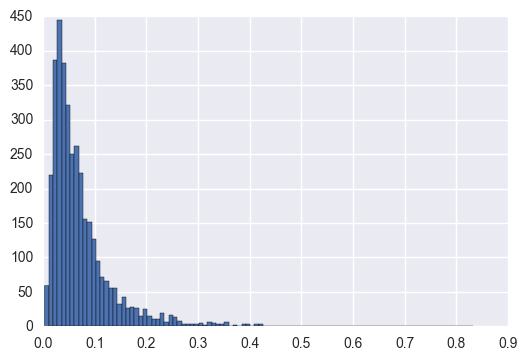

In [475]:
z2['CosineSimilarity'].hist(bins = 100);

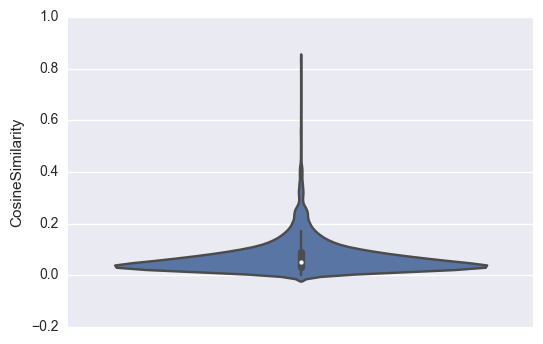

In [476]:
sns.violinplot(y = z2['CosineSimilarity'])

In [477]:
z2.sort(['CosineSimilarity'], ascending = False).head(10)

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Goal,Paragraph,CosineSimilarity
13496,13,116,0.832355
4693,5,233,0.605104
5203,5,743,0.560503
4021,4,676,0.555803
4694,5,234,0.525317
18559,17,719,0.490452
4698,5,238,0.462638
2371,3,141,0.440796
16098,15,488,0.425857
2650,3,420,0.423284


In [497]:
z3 = pd.pivot_table(z2, values = 'CosineSimilarity',index = 'Paragraph', aggfunc = 'max').reset_index()

z3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 2 columns):
Paragraph           897 non-null int64
CosineSimilarity    897 non-null float64
dtypes: float64(1), int64(1)
memory usage: 14.1 KB


In [479]:
z4 = pd.merge(z3, z2, how = 'left', left_on = ['Paragraph','CosineSimilarity'], right_on = ['Paragraph','CosineSimilarity'])
z4 = pd.merge(z4, Paragraph_DF, how = 'left', left_on = 'Paragraph', right_on = 'Number')
z4 = pd.merge(z4, SDG_Targets, how = 'left', left_on = 'Goal', right_on = 'ID')
z4 = z4.drop(['Number','ID','Goal_y'],1)
z4.rename(columns={'Goal_x': 'Goal'}, inplace = True)
z4 = z4[(z4['TrimText'].str.len() > 100)]
#z4['Confidence'] = np.log1p(z4['CosineSimilarity'])
z4.head()

,Paragraph,CosineSimilarity,Goal,Text,TrimText,StemText,OrigionalText,GoalText,TrimGoal
0,0,0.030548,16,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volume e...,eleventh five year plan main document volum el...,Peaceful Societies Promote peaceful and inclus...,peaceful inclusive societies access justice a...,peaceful inclusive societies access justice bu...
1,1,0.171597,8,ISBN 978 99936 55 01 5 Eleventh Five Year ...,isbn eleventh five year plan main document vol...,isbn eleventh five year plan main document vol...,"Employment Promote sustained, inclusive and su...",inclusive economic growth full productive empl...,inclusive economic growth full productive empl...
2,2,0.212145,3,The government has provided education to our y...,government provided education nation prosper s...,govern provid educ nation prosper sound educ m...,Health Ensure healthy lives and promote well-b...,health lives well being all ages,health lives well ages
3,3,0.121224,8,The recent Rupee shortage is a serious proble...,recent rupee shortage serious feel reminder mu...,recent rupe shortag seriou feel remind must ex...,"Employment Promote sustained, inclusive and su...",inclusive economic growth full productive empl...,inclusive economic growth full productive empl...
6,8,0.050040,14,Royal Government of Bhutan PRIME MINISTER ...,royal government bhutan prime minister elevent...,royal govern bhutan prime minist eleventh five...,Climate change Conserve and sustainably use t...,oceans seas marine resources sustainable devel...,oceans seas marine resources sustainable devel...


In [482]:
z4.to_csv(dir + 'rebuild.csv')

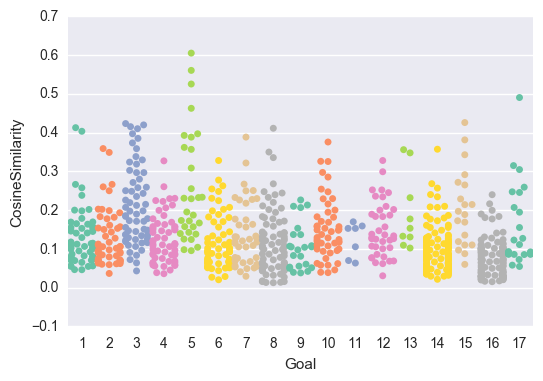

In [483]:
plt = sns.swarmplot(x="Goal", y="CosineSimilarity", data=z4, size = 5, edgecolor = 'w', palette = 'Set2');

In [484]:
SubTargets = pd.read_excel(dir +'SDG_test.xlsx', names = ['ID','GoalID','Target'],sheetname = 'Sheet2')
SubTargets['TrimTarget'] = ''
SubTargets['StemTarget'] = ''

stargtext = []
x=0

while x < len(SubTargets):
    y = SubTargets['Target'][x].lower().replace('-',' ').split(' ')
    y = [z for z in y if z.isalpha() if z not in stop]
    stargtext.append(' '.join(y))
    x=x+1
    
SubTargets['TrimTarget'] = stargtext

In [485]:
stemstargtext = []
x=0

while x < len(SubTargets):
    y = SubTargets['TrimTarget'][x].split(' ')
    y = ' '.join([porter.stem(z) for z in y])
    stemstargtext.append(y)
    x=x+1
    
SubTargets['StemTarget'] = stemstargtext

In [486]:
SubTargets.head()

,ID,GoalID,Target,TrimTarget,StemTarget
0,1.1,1,"By 2030, eradicate extreme poverty for all peo...",eradicate extreme poverty people currently mea...,erad extrem poverti peopl current measur peopl...
1,1.2,1,"By 2030, reduce at least by half the proportio...",reduce least half proportion women children ag...,reduc least half proport women children age li...
2,1.3,1,Implement nationally appropriate social protec...,implement nationally appropriate social protec...,implement nation appropri social protect syste...
3,1.4,1,"By 2030, ensure that all men and women, in par...",ensure men particular poor equal rights econom...,ensur men particular poor equal right econom w...
4,1.5,1,"By 2030, build the resilience of the poor and ...",build resilience poor vulnerable situations re...,build resili poor vulner situat reduc exposur ...


In [502]:
z4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 896
Data columns (total 9 columns):
Paragraph           863 non-null int64
CosineSimilarity    863 non-null float64
Goal                863 non-null int64
Text                863 non-null object
TrimText            863 non-null object
StemText            863 non-null object
OrigionalText       863 non-null object
GoalText            863 non-null object
TrimGoal            863 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 67.4+ KB


In [615]:
subtargets = list(SDG_Targets['ID'])
SubGoal_Match =pd.DataFrame(columns = ['Goal','Target','Paragraph','T_Cosine'])

y = 1
                                       
while y < len(subtargets)+1:
    z5 = z4[(z4['Goal'] == y)]
    SubTargets1 = SubTargets[(SubTargets['GoalID'] == y)]
    trimtext = list(z5['StemText'])
    trimstarget = list(SubTargets1['StemTarget'])
    newcolumns = list(SubTargets1['ID'])
    
    t = TFIDFtotable(trimtext, trimstarget, newcolumns)
    t['Goal'] = y
    
    frames = [SubGoal_Match, t]
    SubGoal_Match = pd.concat(frames)
    y=y+1

In [616]:
SubGoal_Max = pd.pivot_table(SubGoal_Match, values = 'T_Cosine',columns = 'Paragraph', aggfunc = 'max').reset_index()
SubGoal_Max = pd.merge(SubGoal_Max, SubGoal_Match, how = 'left', left_on = ['Paragraph','T_Cosine'], right_on = ['Paragraph','T_Cosine'])
SubGoal_Max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 864
Data columns (total 4 columns):
Paragraph    865 non-null float64
T_Cosine     865 non-null float64
Goal         865 non-null float64
Target       865 non-null object
dtypes: float64(3), object(1)
memory usage: 33.8+ KB


In [617]:
SubGoal_Max = SubGoal_Max[(SubGoal_Max['T_Cosine'] > 0)] 
SubGoal_Max = pd.merge(SubGoal_Max, Paragraph_DF, how = 'left', left_on = 'Paragraph', right_on = 'Number')
SubGoal_Max = pd.merge(SubGoal_Max, SubTargets, how = 'left', left_on = 'Target', right_on = 'ID')
SubGoal_Max = SubGoal_Max.drop(['Number','GoalID','StemTarget','ID'],1)
SubGoal_Max.rename(columns={'Target_x': 'Target',
                              'Text':'PText',
                              'TrimText':'PTrimText',
                              'Target_y':'TargetText'}, inplace = True)
SubGoal_Max['Target'] = SubGoal_Max['Target'].astype(str)
SubGoal_Max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 864
Data columns (total 9 columns):
Paragraph     865 non-null float64
T_Cosine      865 non-null float64
Goal          865 non-null float64
Target        865 non-null object
PText         865 non-null object
PTrimText     865 non-null object
StemText      865 non-null object
TargetText    865 non-null object
TrimTarget    865 non-null object
dtypes: float64(3), object(6)
memory usage: 67.6+ KB


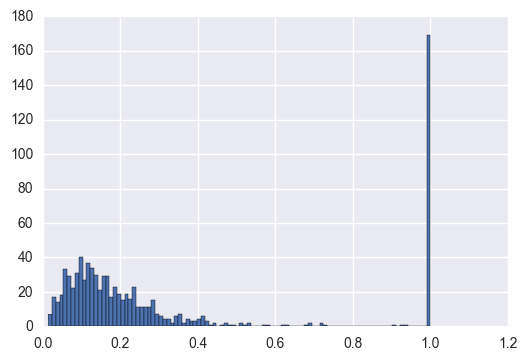

In [618]:
SubGoal_Max['T_Cosine'].hist(bins = 100);

In [619]:
SubGoal_Max.to_csv(dir + 'target_assign.csv')

In [623]:
corpus = trimtext + trimstarget

x = tfidfvectorizer.fit_transform(corpus)
x = pd.DataFrame((x * x.T).A)

x = x.ix[:,:len(trimstarget)-1]
x.columns = newcolumns
#x=x.reset_index()

x['Text'] = trimtext
x = pd.merge(x, Paragraph_DF, how = 'left', left_on = 'Text', right_on = 'StemText')
x=x.drop(['Text_x','Text_y','TrimText','StemText'],1)
x=pd.melt(x, id_vars=['Number'])
x.rename(columns={'variable': 'Target','value':'T_Cosine'}, inplace = True)
#x.columns =['Target','Paragraph','T_Cosine']
TFIDFTable = x

ValueError: Length of values does not match length of index

In [621]:
len(x),len(trimtext)

(513, 27)

In [622]:
x

,Number,Target,T_Cosine
0,13,17.1,1.000000
1,26,17.1,0.124759
2,47,17.1,0.148360
3,53,17.1,0.101118
4,60,17.1,0.079244
5,112,17.1,0.116513
6,118,17.1,0.073487
7,128,17.1,0.613251
8,159,17.1,0.091009
9,192,17.1,0.024585
